## 텐서(Tensor)
Tensorflow에서는 값을 보관하는 방법으로 Tensor를 사용한다.

### tensorflow import
numpy와 똑같이 tensorflow를 불러오고 이를 tf라고 별명을 붙인다.

In [1]:
import tensorflow as tf
import numpy as np
from IPython.display import Image

## Tensor type
대표적으로 다음과 같이 3가지 형태로 데이터를 만든다.

### 1. tf.constant()
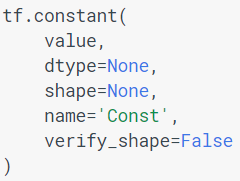

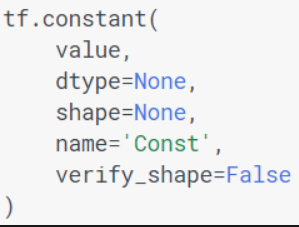

In [2]:
Image(filename='./data/tf.constant().png', width=250)

In [3]:
tf.constant([1,2,3])

<tf.Tensor 'Const:0' shape=(3,) dtype=int32>

In [4]:
tf.constant(np.zeros([1,3]))

<tf.Tensor 'Const_1:0' shape=(1, 3) dtype=float64>

### 2. tf.Variable()
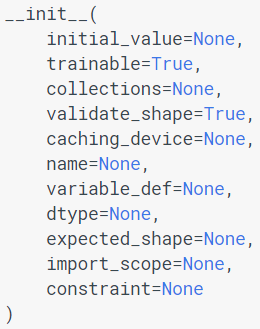

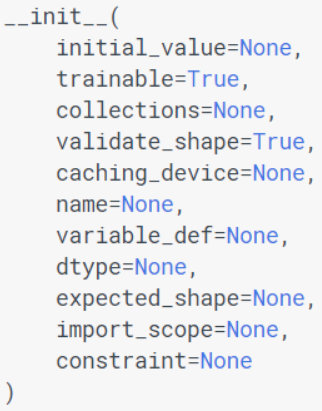

In [5]:
Image(filename='./data/tf.Variable().png', width=250)

In [6]:
tf.Variable([[1,2],[3,4]])

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32_ref>

In [7]:
tf.Variable(tf.zeros([4, 4]))

<tf.Variable 'Variable_1:0' shape=(4, 4) dtype=float32_ref>

In [8]:
tf.Variable(tf.random_uniform([3,4]))

<tf.Variable 'Variable_2:0' shape=(3, 4) dtype=float32_ref>

### 3. tf.placeholder(data type)
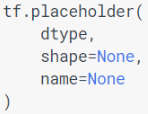

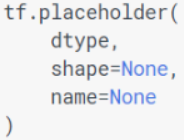

In [9]:
Image(filename='./data/tf.placeholder().png', width=150)

In [10]:
tf.placeholder(tf.float32)

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [11]:
tf.placeholder(tf.float32, shape=[3,4])

<tf.Tensor 'Placeholder_1:0' shape=(3, 4) dtype=float32>

In [12]:
tf.constant(np.ones([3,3,3]))

<tf.Tensor 'Const_2:0' shape=(3, 3, 3) dtype=float64>

In [13]:
tf.Variable(np.random.random([2,4]))

<tf.Variable 'Variable_3:0' shape=(2, 4) dtype=float64_ref>

In [14]:
tf.placeholder(tf.float32,shape=[3,4])

<tf.Tensor 'Placeholder_2:0' shape=(3, 4) dtype=float32>

In [15]:
tf.zeros([1,2,3,4])

<tf.Tensor 'zeros_1:0' shape=(1, 2, 3, 4) dtype=float32>

## Session
텐서들의 값을 가져오려면 tf.Session을 사용해야 한다.

In [16]:
sess = tf.Session()

In [17]:
a = tf.constant([1,2,3])
sess.run(a)

array([1, 2, 3], dtype=int32)

In [18]:
x = tf.constant(np.ones([3,3,3]))
y=tf.Variable(np.random.random([1,2]))
sess.run(tf.global_variables_initializer())
sess.run([x,y])

[array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]), array([[0.04860959, 0.22981294]])]

## Variable 초기화
Variable은 session으로 출력하기 전에 초기화해주어야 한다. 그렇지 않으면 에러가 발생

In [19]:
b = tf.Variable(10)
sess.run(b) # Error

FailedPreconditionError: Attempting to use uninitialized value Variable_5
	 [[{{node _retval_Variable_5_0_0}} = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_5)]]

일일이 변수화를 초기화할 수 있지만 보통 한꺼번에 초기화 하기 때문에 주로 `tf.global_variables_initializer()`를 사용한다.

In [20]:
sess.run(tf.global_variables_initializer())
sess.run(b)

10

## placeholder에 값 넣기 : feed_dict
placeholder는 값을 미리 넣는 것이 아니라 session을 실행(run)할 때 넣을 수 있다. 매개변수 `feed_dict`를 통해 어떤 텐서에 어떤 값을 넣는지 결정한다.

feed_dict ={**텐서**: **값**}

In [21]:
ph = tf.placeholder(tf.float32)
sess.run(ph, feed_dict={ph:[1,2,3]})

array([1., 2., 3.], dtype=float32)

만약 어떤 shape를 고정해서 넣고 싶은 경우 placeholder를 만들 때 정해줄 수 있다. 고정하지 않을 부분들은 **None**으로 정해주면 된다.

In [22]:
import numpy as np

ph2 = tf.placeholder(tf.float32, shape=[None, 2])
print(ph2)

Tensor("Placeholder_4:0", shape=(?, 2), dtype=float32)


In [23]:
print(sess.run(ph2, feed_dict={ph2 : [[1,2], [3,4]]}))

[[1. 2.]
 [3. 4.]]


In [24]:
print(sess.run(ph2, feed_dict={ph2 : [[3,4,5]]})) # Error

ValueError: Cannot feed value of shape (1, 3) for Tensor 'Placeholder_4:0', which has shape '(?, 2)'

In [25]:
ph = tf.placeholder(tf.float32,shape=[3,4])
dic = {ph:[[3,4,4,5],[2,2,1,4],[1,1,2,2]]}
sess.run(ph,feed_dict=dic)

array([[3., 4., 4., 5.],
       [2., 2., 1., 4.],
       [1., 1., 2., 2.]], dtype=float32)

## Tensorflow 연산
Tensorflow는 연산을 위해 다양한 함수들을 제공한다. 또한 operator도 지원하기 때문에 `tf.add`나 `tf.mul`같은 경우는 `+`, `*`로 대체할 수 있다.
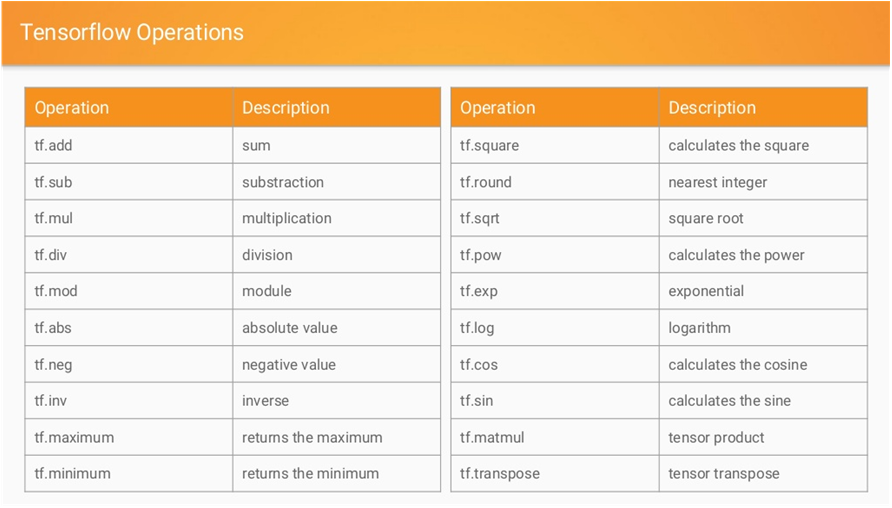

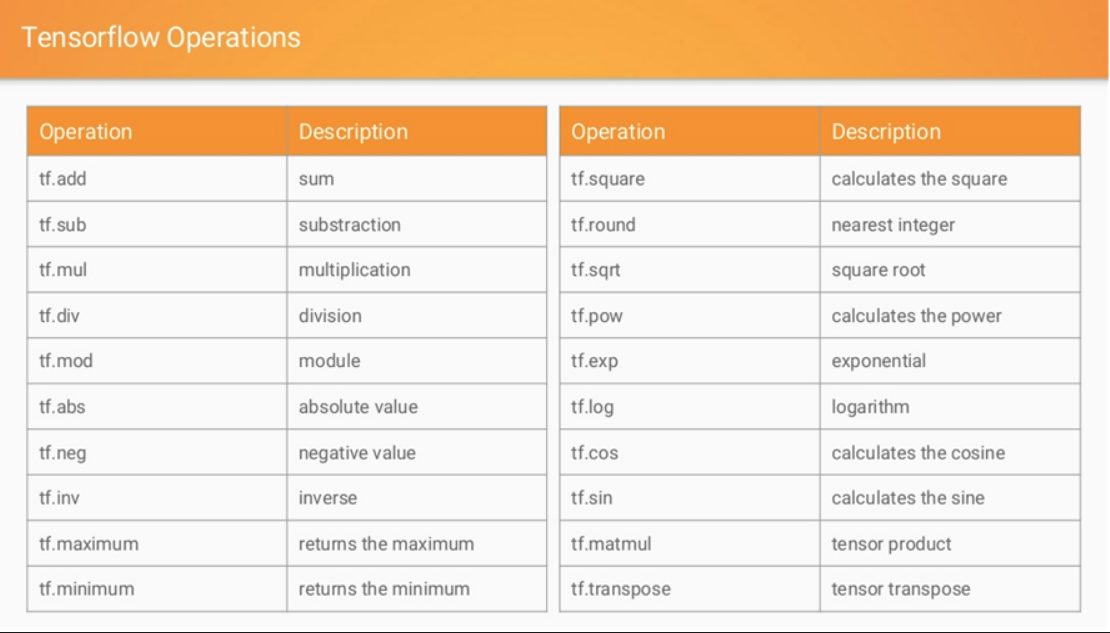

In [26]:
Image(filename='./data/tf_op.png', width=900)

In [27]:
a = tf.constant([[1, 2],[3, 4]])
b = tf.constant([[4, 3],[2, 1]])

## 사칙연산

In [28]:
add = a + b
sub = a - b
mul = a * b
div = a / b

print('add')
print(sess.run(add))
print('sub')
print(sess.run(sub))
print('mul')
print(sess.run(mul))
print('div')
print(sess.run(div))

add
[[5 5]
 [5 5]]
sub
[[-3 -1]
 [ 1  3]]
mul
[[4 6]
 [6 4]]
div
[[0.25       0.66666667]
 [1.5        4.        ]]


## 그 외 연산

### 행렬곱

In [29]:
c = tf.constant([[1, 2],[3, 4]])
d = tf.constant([[4], [3]])
print(c)
print(d)

Tensor("Const_7:0", shape=(2, 2), dtype=int32)
Tensor("Const_8:0", shape=(2, 1), dtype=int32)


In [30]:
matmul = tf.matmul(c, d)
sess.run(matmul)
# [1 2]   [4]    [[1 x 4 + 2 x 3],    [[10],
# [3 4] x [3] =   [3 x 4 + 4 x 3]] =   [24]]
            

array([[10],
       [24]], dtype=int32)

## 그 외 함수
이 외에도 numpy와 유사하게 배열을 생성하거나 제곱을 하는 등 다양한 함수들이 있다.

In [31]:
sess.run(tf.zeros([1,2,3]))

array([[[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
sess.run(tf.ones([2,2,2]))

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]], dtype=float32)

In [33]:
sess.run(tf.square(10))

100

In [34]:
sess.run(tf.log(1.3))

0.26236424

## 연습 1

입력이 inputs인 placeholder를 만들고 다음과 같은 연산을 수행한 결과가 나오는 코드를 작성 후 Session을 실행할 때 숫자 3을 넣어보자

inputs = placeholder

mul = inputs * 3

add = mul + 1

sub = add - 9

In [35]:
import tensorflow as tf

sess = tf.Session()
inputs = tf.placeholder(tf.float32)
mul = inputs * 3
add = mul + 1
sub = add - 9

result = sess.run(sub, feed_dict={inputs:3})
print("result =", result)

result = 1.0


## 연습 2

Numpy를 통해 배열을 만들고 다음과 같은 배열 연산을 수행하도록 한다.

이 때

input_1은 \[\[1,2\],
           \[3,4\],
           \[5,6\]\]
           
input_2는 \[\[1,2\],
           \[3,4\]\]

를 입력으로 넣어준다.

---

input_1 = placeholder (shape \[3, 2\])

input_2 = placeholder (shape \[2, 2\])

sum_1 = input_1의 0번째 차원에 대한 합 ( 결과 shape => \[1, 2\] )

mean_2 = input_2의 0번째 차원에 대한 평균 ( 결과 shape => \[1, 2\] )

mul = sum_1 * mean_2

In [36]:
import tensorflow as tf
import numpy as np

sess = tf.Session()
input_1 = tf.placeholder(tf.float32, shape=[3, 2])
input_2 = tf.placeholder(tf.float32, shape=[2, 2])
a = sess.run(input_1, feed_dict={input_1:[[1,2],[3,4],[5,6]]})
b = sess.run(input_2, feed_dict={input_2:[[1,2],[3,4]]})

sum_1 = np.sum(a, axis=0)
mean_2 = np.mean(b, axis=0)
mul = sum_1 + mean_2

print("result =", mul)

result = [11. 15.]


### good